In [1]:
!wget https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import requests

url = "https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta"
response = requests.get(url)

with open("ls_orchid.fasta", "w") as f:
    f.write(response.text)

print("File downloaded successfully.")


File downloaded successfully.


In [3]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [6]:
from Bio import SeqIO

sequences = []
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    sequences.append(seq_record.seq)

In [7]:
sequences

[Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGG...CGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAACAG...GGC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TAA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAAACAACAT...CAT'),
 Seq('ACGGCGAGCTGCCGAAGGACATTGTTGAGACAGCAGAATATACGATTGAGTGAA...AAA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...CCC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAG...TGT'),
 Seq('TGTTGAGATAGCAGAATATACATCGAGTGAATCCGGAGGACCTGTGGTTATTCG...GCA'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGATAGTAG...AGC'),
 Seq('CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTTGAGACAGCAG...AAG'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...GAG'),
 Seq('GTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGTAGAATATATGATCGAGT...ACC'),
 Seq('CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTTGAGACAGCAG...TTT'),
 Seq('ATATGATCGAGTGAATCTGGTGGACTTGTGGTTACTCAGCTCGCCATAGGCTTT...TTA'),
 Seq('CGTAACAAGGTTTC

Histogram of sequence lengths

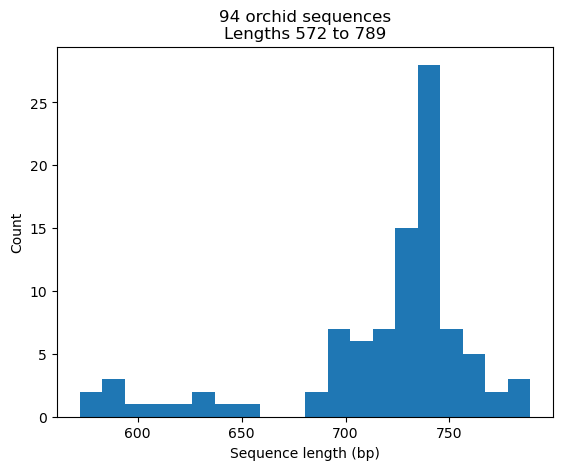

In [8]:
sizes = [len(rec) for rec in sequences]

import matplotlib.pyplot as plt
plt.hist(sizes, bins=20)
plt.title(f"{len(sizes)} orchid sequences\nLengths {min(sizes)} to {max(sizes)}")
plt.xlabel("Sequence length (bp)")
plt.ylabel("Count")
plt.show()

Notice that most of these orchid sequences are about 740 bp long!

Plot of sequence GC%
Having read in each sequence and calculated the GC%, we will sort them into ascending order.

In [14]:
# functions or values are available in the Bio.SeqUtils
from Bio.SeqUtils import *

# List all values/functions in Bio.SeqUtils
print(dir())


['BiopythonDeprecationWarning', 'CodonAdaptationIndex', 'GC123', 'GC_skew', 'IUPACData', 'In', 'Out', 'Seq', 'SeqIO', '_', '_7', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'complement', 'complement_rna', 'cos', 'exit', 'exp', 'gc_fraction', 'get_ipython', 'log', 'molecular_weight', 'nt_search', 'open', 'pi', 'plt', 'quit', 're', 'seq1', 'seq3', 'seq_record', 'sequences', 'sin', 'six_frame_translations', 'sizes', 'standard_dna_table', 'translate', 'warnings', 'xGC_skew']


In [17]:
from Bio.SeqUtils import GC123
gc_values = sorted(GC123(rec) for rec in sequences)

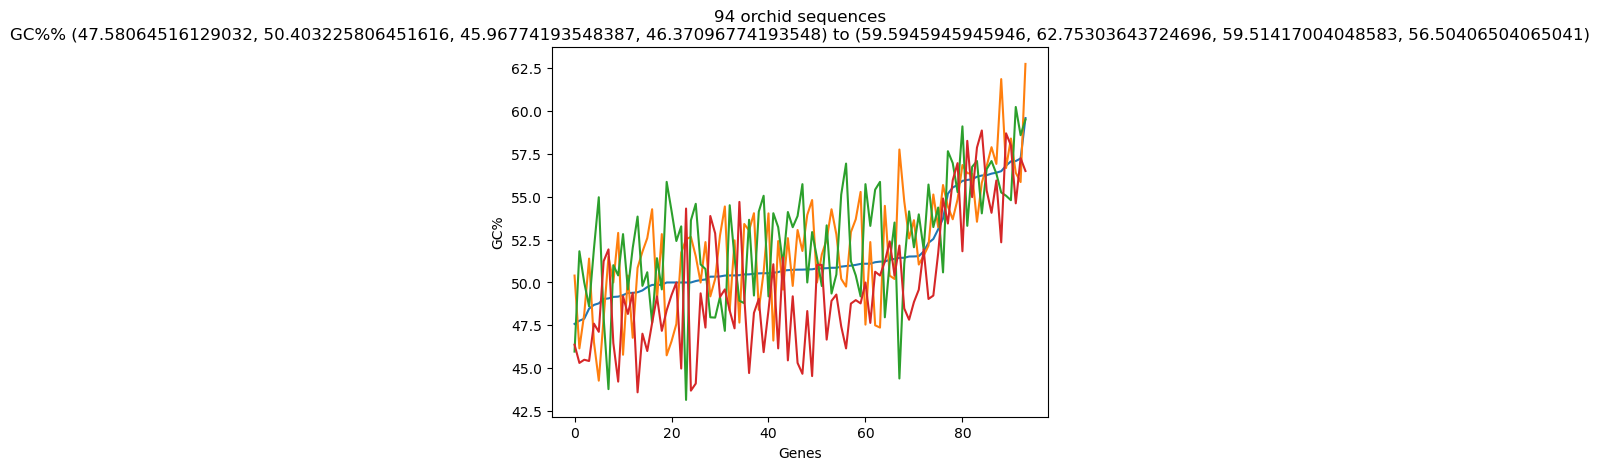

In [18]:
plt.plot(gc_values)
plt.title(f"{len(gc_values)} orchid sequences\nGC%% {min(gc_values)} to {max(gc_values)}")
plt.xlabel("Genes")
plt.ylabel("GC%")
plt.show()